<a href="https://colab.research.google.com/github/AmelxJamal/STEM-Away-Internship/blob/master/Notebook_STEM_Away.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 85 kB 3.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.7 MB 23.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.3 MB 53.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101 kB 14.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 65.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6 MB 58.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=40748711f95e685761580f16b4cabf85224895ee16ca36d41b2c123

# Kaggle Quora Dataset

In [3]:
!pip install kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 58 kB 3.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=982244b90a3fd3a8f92a8a91c0e3ed008151ed0b6da4851711aee8de3c7c88dd
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
!mkdir ~/.kaggle

In [5]:
!cp /content/kaggle.json /root/.kaggle

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
import os
os.environ["KAGGLE_CONFIG_"] =' /content/kaggle.json'

In [8]:
!kaggle competitions download -c quora-question-pairs

 95% 293M/309M [00:02<00:00, 104MB/s]
100% 309M/309M [00:02<00:00, 123MB/s]


In [9]:
!unzip /content/quora-question-pairs.zip

Archive:  /content/quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [10]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [11]:
train_df = pd.read_csv('/content/train.csv')
train_df.head(10)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   
5   5    11    12  Astrology: I am a Capricorn Sun Cap moon and c...   
6   6    13    14                                Should I buy tiago?   
7   7    15    16                     How can I be a good geologist?   
8   8    17    18                    When do you use „Ç∑ instead of „Åó?   
9   9    19    20  Motorola (company): Can I hack my Charter Moto...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0  
5  I'm a triple Capricorn (Sun, Moon and ascendan...             1  
6  What keeps childern active and far from phone ...             0  
7          What should I do to be a great geologist?             1  
8              When do you use "&" instead of "and"?             0  
9  How do I hack Motorola DCX3400 for free internet?             0

In [12]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

test_id                                          question1  \
0        0  How does the Surface Pro himself 4 compare wit...   
1        1  Should I have a hair transplant at age 24? How...   
2        2  What but is the best way to send money from Ch...   
3        3                        Which food not emulsifiers?   
4        4                   How "aberystwyth" start reading?   

                                           question2  
0  Why did Microsoft choose core m3 and not core ...  
1        How much cost does hair transplant require?  
2                      What you send money to China?  
3                                  What foods fibre?  
4                     How their can I start reading?

# Retrieval System

In [13]:
train_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [14]:
x = train_df[['id', 'qid1', 'qid2', 'question1', 'question2']]
y = train_df.is_duplicate
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.998, random_state = 0)

In [15]:
x_train.shape

(808, 5)

In [16]:
import json
from sentence_transformers import SentenceTransformer, CrossEncoder, util
import gzip
import os
import torch
import pandas as pd

if not torch.cuda.is_available():
    print("Warning: No GPU found. Please add GPU to your notebook")


#We use the Bi-Encoder to encode all passages, so that we can use it with sematic search
bi_encoder = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
bi_encoder.max_seq_length = 256     #Truncate long passages to 256 tokens
top_k = 32                          #Number of passages we want to retrieve with the bi-encoder

#The bi-encoder will retrieve 100 documents. We use a cross-encoder, to re-rank the results list to improve the quality
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# df = pd.read_csv('Questions.csv') --> kaggle dataset
# passages = df.body[:9000].to_numpy()


qoura = x_train.question1.to_numpy()
passages = qoura
print("Passages:", len(passages))

# We encode all passages into our vector space. This takes about 5 minutes (depends on your GPU speed)
corpus_embeddings = bi_encoder.encode(passages, convert_to_tensor=True, show_progress_bar=True)

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Passages: 808


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


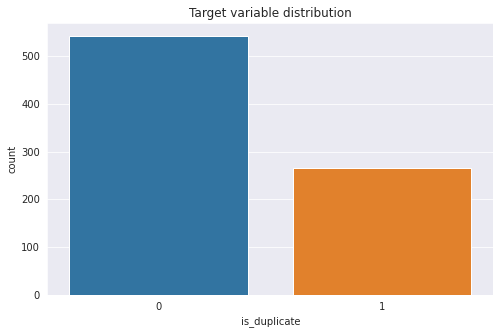

In [17]:
# Target variable distribution
train_sampled = x_train
train_sampled['is_duplicate'] = y_train
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train_sampled["is_duplicate"])
plt.title('Target variable distribution')
plt.show()

In [18]:
# This function will search the corpus for passages that match the query
def search(query, top=3):
   
    ##### Sematic Search #####
    # Encode the query using the bi-encoder and find potentially relevant passages
    question_embedding = bi_encoder.encode(query, convert_to_tensor=True)
    question_embedding = question_embedding.cuda()
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    ##### Re-Ranking #####
    # Now, score all retrieved passages with the cross_encoder
    cross_inp = [[query, passages[hit['corpus_id']]] for hit in hits]
    cross_scores = cross_encoder.predict(cross_inp)

    # Sort results by the cross-encoder scores
    for idx in range(len(cross_scores)):
        hits[idx]['cross-score'] = cross_scores[idx]

    # Output of top-k hits from bi-encoder
    
    bi_encoder_hits = sorted(hits, key=lambda x: x['score'], reverse=True)
    
    bi_list, scores = [],[]
    for hit in bi_encoder_hits[0:top]:
        bi_list.append(passages[hit['corpus_id']])
        scores.append(hit['score'])

    # Output of top-k hits from re-ranker
   
    cross_encoder_hits = sorted(bi_encoder_hits, key=lambda x: x['cross-score'], reverse=True)
    cross_list, scores_cross = [], []
    for hit in cross_encoder_hits[0:3]:
        cross_list.append((passages[hit['corpus_id']]))
        scores_cross.append(hit['cross-score'])
    return bi_list, cross_list, scores, scores_cross

In [19]:
from collections import defaultdict
def compute_hits(embeddings, questions_list, model = 'cross', top=3):
  hits_dict = defaultdict(lambda: 0.0)
  for idx, question in enumerate(questions_list):
    hits = []
    bi_hits, cross_hit, bi_scores, cross_scores = search(question, top=top)
    if model == 'bi':
      hits_dict[idx] = (bi_hits, bi_scores)
    else:
      hits_dict[idx] = (cross_hit, cross_scores)
  return hits_dict

In [20]:
def evaluate(list_hits, list_question2, labels):
  counts, length, TP, FP, TN, FN = 0,0,0,0,0,0
  TP_score, FP_score, TN_score, FN_score = [], [], [], []
  for idx, q in enumerate(list_question2):
      length +=1
      if labels[idx] == 1 and q in list_hits[idx][0]:
        counts+=1
        TP+=1
        # TP_score.append(list_hits[idx][1][])
      if labels[idx] == 0 and q not in list_hits[idx][0]:
        counts+=1
        TN+=1
      if labels[idx] == 1 and q not in list_hits[idx][0]:
        FN+=1
      if labels[idx] == 0 and q in list_hits[idx][0]:
        FP+=1

  accuracy = (counts/length)*100
  sensitivity = TP/(TP+FN)
  specificity = TN/(TN+FP)
  FPR = 1-specificity
  return accuracy, sensitivity, specificity, FPR, TP,TN,FP,FN

In [21]:
hits = compute_hits(corpus_embeddings, x_train.question2.to_numpy(),top=5)

In [22]:
accuracy, sensitivity, specificity, FPR , TP, TN, FP, FN= evaluate(hits, x_train.question1.to_numpy(),x_train.is_duplicate.to_numpy())

In [23]:
accuracy, sensitivity, specificity, FPR, TP,TN,FP,FN

(44.67821782178218,
 0.9887218045112782,
 0.18081180811808117,
 0.8191881918819188,
 263,
 98,
 444,
 3)

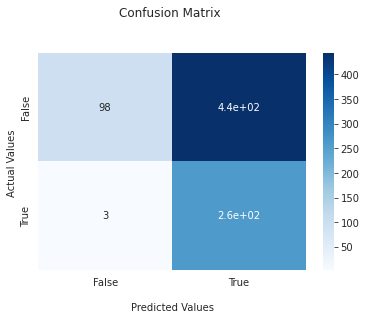

In [24]:
import seaborn as sns

cf = np.array([
    [TN, FP],
    [FN, TP]
])
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
for query in train_df.question2[:2].to_numpy():
  search(query)

#Pinecone

In [26]:
!pip install -qU pip pinecone-client

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.0 MB 5.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 175 kB 66.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 269 kB 69.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 58 kB 3.1 MB/s 


In [27]:
import pinecone
import os

api_key = 'f158288a-05ab-4c9f-8674-4a23758efffe'
pinecone.init(api_key=api_key, environment='us-west1-gcp')

In [28]:
import pinecone.info

version_info = pinecone.info.version()
server_version = ".".join(version_info.server.split(".")[:2])
client_version = ".".join(version_info.client.split(".")[:2])

assert client_version == server_version, "Please upgrade pinecone-client."

In [29]:
# Giving our index a name
index_name = "stem-away"
# Delete the index, if an index of the same name already exists
if index_name in pinecone.list_indexes():
    pinecone.delete_index(index_name)

In [30]:
dimensions = 384
pinecone.create_index(name=index_name, dimension=dimensions) # , metric="cosine", shards=1

In [31]:
index = pinecone.Index(index_name=index_name)

In [32]:
x_train.head()

id    qid1    qid2  \
201990  201990  304141  304142   
360317  360317  490095  490096   
323329  323329   10538  313763   
362380  362380  492286  492287   
92311    92311  154551  154552   

                                                question1  \
201990          What is it like working with Elijah Wood?   
360317                 What is something that amazes you?   
323329     What type of food should I eat to lose weight?   
362380  How much cloud space is allocated for a Blogsp...   
92311   I wanted to do bcom .i have taken physical edu...   

                                                question2  is_duplicate  
201990          What is it like to work with Elijah Wood?             0  
360317  What are the 10 most amazing things animals ca...             0  
323329             What should I eat while losing weight?             1  
362380  How much can I earn from Adsense on a Blogspot...             0  
92311   I have taken general maths in SSC and I want t...             0

In [33]:
len(x_train)

808

In [34]:
temp = pd.DataFrame(corpus_embeddings.cpu().numpy())
temp.head()

0         1         2         3         4         5         6    \
0  0.003152  0.038828  0.026901 -0.040638 -0.144636  0.026495  0.043506   
1 -0.014288  0.004082  0.016820  0.087492  0.029660 -0.079683  0.210575   
2  0.012521  0.011083  0.023680 -0.015385  0.015189  0.035435  0.092652   
3  0.022891 -0.063757  0.020371  0.040703  0.025737 -0.023490  0.054976   
4 -0.009789  0.000939 -0.010672 -0.026875 -0.077500  0.001792  0.010935   

        7         8         9    ...       374       375       376       377  \
0 -0.051917 -0.051698 -0.000405  ...  0.083308 -0.071614  0.027393 -0.071938   
1 -0.024216 -0.049562 -0.072375  ...  0.024525  0.016527 -0.017530  0.044806   
2 -0.039161 -0.022873  0.016119  ... -0.004785  0.058973  0.077339 -0.019092   
3 -0.003141  0.040929  0.068224  ...  0.015075 -0.020086 -0.023260 -0.024655   
4  0.043297 -0.084401  0.023772  ...  0.036036  0.097051  0.047306 -0.006336   

        378       379       380       381       382       383  
0 -0.035725 -0.025033  0.088633 -0.033141 -0.006565  0.133448  
1  0.007338  0.047060  0.193736  0.078936 -0.041761 -0.013536  
2 -0.022906 -0.055296  0.057317  0.003504  0.013691  0.002120  
3 -0.070663 -0.057975 -0.042468  0.008290 -0.015142 -0.004042  
4 -0.103112  0.129510  0.005415 -0.049905 -0.011267 -0.009659  

[5 rows x 384 columns]

In [35]:
vectors_df = pd.DataFrame()
vectors_df['id'] = x_train['id'].apply(lambda x : str(x))
vectors_df['vector']= temp.values.tolist()
vectors_df.head()

id                                             vector
201990  201990  [0.003152142046019435, 0.03882816061377525, 0....
360317  360317  [-0.014288224279880524, 0.0040819994173944, 0....
323329  323329  [0.012520530261099339, 0.011083300225436687, 0...
362380  362380  [0.02289072424173355, -0.06375698745250702, 0....
92311    92311  [-0.009788676165044308, 0.0009392699575982988,...

In [36]:
import itertools

def chunks(iterable, batch_size=100):
    it = iter(iterable)
    chunk = tuple(itertools.islice(it, batch_size))
    while chunk:
        yield chunk
        chunk = tuple(itertools.islice(it, batch_size))

In [37]:
for batch in chunks(zip(vectors_df.id, vectors_df.vector)):
    index.upsert(vectors=batch)

In [38]:
query_embeddings = bi_encoder.encode(x_train.question2[:10].to_numpy(), convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
# query pinecone
query_results = [index.query(xq, top_k=5) for xq in query_embeddings.tolist()]

# show the results
for question, res in zip(x_train.question2[:10].to_numpy(), query_results):
    print("\n\n\n Original question : " + str(question))
    print("\n Most similar questions based on pinecone vector search: \n")

    ids = [match.id for match in res.matches]
    scores = [match.score for match in res.matches]
    df_result = pd.DataFrame(
        {
            "id": ids,
            "question": [
                x_train[x_train.id == int(_id)].question1.values[0] for _id in ids 
            ],
            "score": scores,
        }
    )
    print(df_result)




 Original question : What is it like to work with Elijah Wood?

 Most similar questions based on pinecone vector search: 

       id                                      question     score
0  201990     What is it like working with Elijah Wood?  0.983413
1  248867             How are Goku and Vegeta brothers?  0.266303
2  328084              Good chimney for Indian kitchen?  0.263500
3  200794                    Where is teach mashal art?  0.259378
4  259978  Where is the real sword of Ashoka the great?  0.251210



 Original question : What are the 10 most amazing things animals can do?

 Most similar questions based on pinecone vector search: 

       id                                           question     score
0  233274  What are some cute-looking but fierce wild ani...  0.530682
1  174743  What is the most interesting thing in the inte...  0.453967
2    9630            What are the 10 must see action movies?  0.422938
3  281505  What are the five most important things for a .

In [46]:
pinecone.delete_index(index_name)

# Pinecone Hybrid Search

In [47]:
!pip install -qU pip pinecone-client

In [59]:
!pip install sentence-transformers sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 880.6/880.6 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=5f94863554eeb91a395d105aabc0a60c5f8fc753ea0f6e724d3d3ea0779a7014
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [48]:
import pinecone
import os

api_key = 'f158288a-05ab-4c9f-8674-4a23758efffe'
pinecone.init(api_key=api_key, environment='us-west1-gcp')

In [49]:
import pinecone.info

version_info = pinecone.info.version()
server_version = ".".join(version_info.server.split(".")[:2])
client_version = ".".join(version_info.client.split(".")[:2])

assert client_version == server_version, "Please upgrade pinecone-client."

In [108]:
# Giving our index a name
index_name = "stem-away"
# Delete the index, if an index of the same name already exists
if index_name in pinecone.list_indexes():
    pinecone.delete_index(index_name)

In [109]:
dimensions = 384
pinecone.create_index(name=index_name, dimension=dimensions) # , metric="cosine", shards=1

In [110]:
index = pinecone.Index(index_name=index_name)

In [66]:
questions_data = pd.read_csv('/content/Questions.csv')
questions_data.head(10)

id                                              title  \
0  320268          Html.ActionLink doesn‚Äôt render # properly   
1  324003                                Primitive recursion   
2  390605                                 While vs. Do While   
3  413246                        Protect ASP.NET Source code   
4  454921  Difference between "int[] myArray" and "int my...   
5  472695  Looking for WPF/XAML example that gets XML fro...   
6  587584  What is the preferred way to declare a Java ar...   
7  597572      How do I create a windows service with Python   
8  612711                                  Best C# Profiler?   
9  651291                        Securing a .NET Application   

                                                body  accepted_answer_id  \
0  <p>When using Html.ActionLink passing a string...                 NaN   
1  <p>how  will i define the function 'simplify' ...                 NaN   
2  <p>I've seen both the blocks of code in use se...            390608.0   
3  <p>Im currently doing some research in how to ...                 NaN   
4  <blockquote>\n  <p><strong>Possible Duplicate:...            454928.0   
5  <p>I can imagine WPF has a very easy way to gr...                 NaN   
6  <blockquote>\n  <p><strong>Possible Duplicate:...            587594.0   
7  <p>I really need my python program to run as a...                 NaN   
8  <p>Recently I used RedGate ANTS profiler which...                 NaN   
9  <h3>Duplicate:</h3>\n<blockquote>\n<p><a href=...            651375.0   

   answer_count  comment_count community_owned_date  \
0             0              0                  NaN   
1             0              0                  NaN   
2             0              0                  NaN   
3             0              0                  NaN   
4             0              0                  NaN   
5             0              2                  NaN   
6             0              0                  NaN   
7             0              0                  NaN   
8             0              0                  NaN   
9             0              0                  NaN   

                      creation_date  favorite_count  \
0  2008-11-26 10:42:37.477000+00:00             0.0   
1  2008-11-27 15:12:37.497000+00:00             0.0   
2  2008-12-24 01:49:54.230000+00:00             2.0   
3  2009-01-05 14:23:51.040000+00:00             0.0   
4  2009-01-18 10:22:52.177000+00:00             0.0   
5  2009-01-23 12:21:50.073000+00:00             NaN   
6  2009-02-25 19:57:22.633000+00:00             0.0   
7  2009-02-28 05:47:08.330000+00:00             0.0   
8  2009-03-04 22:16:01.557000+00:00             2.0   
9  2009-03-16 17:07:23.660000+00:00             1.0   

                 last_activity_date                    last_edit_date  \
0  2009-02-06 20:13:54.370000+00:00                               NaN   
1  2012-09-25 19:54:40.597000+00:00  2012-09-25 19:54:40.597000+00:00   
2  2008-12-24 03:08:55.897000+00:00                               NaN   
3  2009-03-24 21:30:22.370000+00:00  2009-01-05 14:42:28.257000+00:00   
4  2009-01-18 10:30:50.930000+00:00  2017-05-23 11:49:26.567000+00:00   
5  2009-01-23 13:23:29.543000+00:00  2009-01-23 12:41:17.037000+00:00   
6  2009-02-25 23:37:23.213000+00:00  2017-05-23 12:20:37.303000+00:00   
7  2020-10-14 06:15:14.207000+00:00  2020-10-14 06:15:14.207000+00:00   
8  2013-01-14 21:17:03.763000+00:00  2010-01-25 15:15:51.767000+00:00   
9  2010-06-09 16:17:12.787000+00:00  2020-06-20 09:12:55.060000+00:00   

  last_editor_display_name  last_editor_user_id owner_display_name  \
0                      NaN                  NaN              Paulo   
1                   Marcin               1288.0                NaN   
2                      NaN                  NaN          Unkwntech   
3             Tom Anderson              13502.0            Velnias   
4                      NaN                 -1.0       Evan Fosmark   
5             Fabian Steeg 

In [98]:
questions_embeddings = bi_encoder.encode(questions_data.title.to_numpy(), convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [99]:
vectors_df = pd.DataFrame()
vectors_df['id'] = questions_data['id'].apply(lambda x : str(x))
vectors_df['vector']= pd.DataFrame(questions_embeddings.cpu().numpy()).values.tolist()
vectors_df.head()

id                                             vector
0  320268  [-0.025011537596583366, -0.07002244889736176, ...
1  324003  [-0.039439257234334946, 0.0774073377251625, -0...
2  390605  [0.08628430217504501, 0.06157788261771202, 0.0...
3  413246  [-0.04510904848575592, 0.032456353306770325, -...
4  454921  [0.00837804563343525, 0.0311595406383276, 0.01...

In [100]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tags_list = [tokenizer.tokenize(sentence.lower()) for sentence in questions_data.tags.to_numpy()]
tags_list[1]

['has',
 '##kell',
 '|',
 'lambda',
 '|',
 'functional',
 '-',
 'programming',
 '|',
 'lambda',
 '-',
 'calculus']

In [101]:
cleaned_tags = []
specials = ['|', '-', '_', '#','.']
for sentence in tags_list:
  res = [i for i in sentence if i not in specials]
  cleaned_tags.append(res)

cleaned_tags[6]

['java', 'arrays', 'declaration']

In [102]:
import itertools

def chunks(iterable, batch_size=100):
    it = iter(iterable)
    chunk = tuple(itertools.islice(it, batch_size))
    while chunk:
        yield chunk
        chunk = tuple(itertools.islice(it, batch_size))

In [111]:
upserts = []
for (id, embedding, tokens) in zip(vectors_df.id, vectors_df.vector, cleaned_tags):
    upserts.append((str(id), embedding, {'tokens': tokens}))

In [112]:
for batch in chunks(upserts):
    index.upsert(vectors=batch)

In [113]:
query_sentence = "How to print in python?"
xq = bi_encoder.encode(query_sentence).tolist()

In [114]:
result = index.query(xq, top_k=10, includeMetadata=True)
result

{'matches': [{'id': '724550',
              'metadata': {'tokens': ['java', '##script', 'j', '##sp']},
              'score': 0.586400509,
              'values': []},
             {'id': '744625',
              'metadata': {'tokens': ['error', 'logging', 'p', '##ys', '##60']},
              'score': 0.585803449,
              'values': []},
             {'id': '633743',
              'metadata': {'tokens': ['visual', 'c', '+', '+']},
              'score': 0.527547479,
              'values': []},
             {'id': '869829',
              'metadata': {'tokens': ['visual',
                                      'studio',
                                      'visual',
                                      'studio',
                                      '2008',
                                      'variables',
                                      'environment']},
              'score': 0.512947083,
              'values': []},
             {'id': '297911',
              'metadata': {

In [115]:
filters = ['python']
result = index.query(xq, top_k=10, filter={
    'tokens': {'$in': filters}})

ids = [int(x['id']) for x in result['matches']]
for i in ids:
    print(questions_data[questions_data.id == int(i)].title.values[0])

How does the win32com python.Interpreter work?
best way to print data in columnar format?
Python 2.5.2 continued
Python: convert alphabetically spelled out numbers to numerics?
How to Change Mouse Cursor in PythonCard
Python: Use the codecs module or use string function decode?
How to set up Python for .NET with Python 2.6.1?
Execution of a OS command from a Python daemon
learning python 3.0 on ubuntu
Python and subprocess


Old result from body embeddings üëá



In [97]:
filters = ['python']
result = index.query(xq, top_k=10, filter={
    'tokens': {'$in': filters}})

ids = [int(x['id']) for x in result['matches']]
for i in ids:
    print(questions_data[questions_data.id == int(i)].title.values[0])

best way to print data in columnar format?
Django Shell shortcut in Windows
How do I create a windows service with Python
How can I check if a box is alive or down using the ip address in Python?
Subtract from an input appended list with a running balance output
pinging mysql using mysql alchemy and python
mod_python.publisher always gives content type 'text/plain'
Can I use a List Comprehension to get Line Indexes from a file?
python, funny business with threads and IDEs?
How to make nntplib author name human readable?


In [116]:
pinecone.delete_index(index_name)

# Training

In [117]:
questions_df = pd.read_csv('/content/Questions.csv')
quesitons_clean = questions_df[questions_df['accepted_answer_id'].notna()]
quesitons_clean['accepted_answer_id'] = quesitons_clean['accepted_answer_id'].apply(lambda x: int(round(x)))
quesitons_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id                                              title  \
2    390605                                 While vs. Do While   
4    454921  Difference between "int[] myArray" and "int my...   
6    587584  What is the preferred way to declare a Java ar...   
9    651291                        Securing a .NET Application   
662    8066                                    .NET Interfaces   

                                                  body  accepted_answer_id  \
2    <p>I've seen both the blocks of code in use se...              390608   
4    <blockquote>\n  <p><strong>Possible Duplicate:...              454928   
6    <blockquote>\n  <p><strong>Possible Duplicate:...              587594   
9    <h3>Duplicate:</h3>\n<blockquote>\n<p><a href=...              651375   
662  <p>Over the past few years I've changed from h...                8086   

     answer_count  comment_count community_owned_date  \
2               0              0                  NaN   
4               0              0                  NaN   
6               0              0                  NaN   
9               0              0                  NaN   
662             1              0                  NaN   

                        creation_date  favorite_count  \
2    2008-12-24 01:49:54.230000+00:00             2.0   
4    2009-01-18 10:22:52.177000+00:00             0.0   
6    2009-02-25 19:57:22.633000+00:00             0.0   
9    2009-03-16 17:07:23.660000+00:00             1.0   
662  2008-08-11 18:30:44.893000+00:00             NaN   

                   last_activity_date                    last_edit_date  \
2    2008-12-24 03:08:55.897000+00:00                               NaN   
4    2009-01-18 10:30:50.930000+00:00  2017-05-23 11:49:26.567000+00:00   
6    2009-02-25 23:37:23.213000+00:00  2017-05-23 12:20:37.303000+00:00   
9    2010-06-09 16:17:12.787000+00:00  2020-06-20 09:12:55.060000+00:00   
662  2013-04-04 15:51:01.583000+00:00  2013-04-04 15:51:01.583000+00:00   

    last_editor_display_name  last_editor_user_id owner_display_name  \
2                        NaN                  NaN          Unkwntech   
4                        NaN                 -1.0       Evan Fosmark   
6                      Eddie                 -1.0              Simon   
9                     Rich B                 -1.0         beakersoft   
662                      NaN            1612146.0                NaN   

     owner_user_id  parent_id  post_type_id  score  \
2            115.0        NaN             1      0   
4          49701.0        NaN             1      0   
6          24039.0        NaN             1      0   
9          19638.0        NaN             1      0   
662          721.0        NaN             1      0   

                                              tags  view_count  
2                          language-agnostic|loops       11086  
4                                      java|arrays         795  
6                          java|arrays|declaration         626  
9    .net|security|obfuscation|reverse-engineering        5968  
662                   .net|user-controls|interface         811

In [118]:
no_dupes = quesitons_clean[['id','accepted_answer_id','body']]
no_dupes.head()

id  accepted_answer_id  \
2    390605              390608   
4    454921              454928   
6    587584              587594   
9    651291              651375   
662    8066                8086   

                                                  body  
2    <p>I've seen both the blocks of code in use se...  
4    <blockquote>\n  <p><strong>Possible Duplicate:...  
6    <blockquote>\n  <p><strong>Possible Duplicate:...  
9    <h3>Duplicate:</h3>\n<blockquote>\n<p><a href=...  
662  <p>Over the past few years I've changed from h...

In [119]:
answers_df = pd.read_csv('/content/Answers.csv')
answers_clean = answers_df[answers_df['id'].notna()]
answers_clean.head()

id  title                                               body  \
0    18    NaN  <p>For a table like this:</p>\n\n<pre><code>CR...   
1   165    NaN  <p>You can use a <a href="http://sharpdevelop....   
2  1028    NaN  <p>The VB code looks something like this:</p>\...   
3  1073    NaN  <p>My first choice would be a dedicated heap t...   
4  1260    NaN  <p>I found the answer. all you have to do is a...   

   accepted_answer_id  answer_count  comment_count community_owned_date  \
0                 NaN           NaN              2                  NaN   
1                 NaN           NaN              0                  NaN   
2                 NaN           NaN              0                  NaN   
3                 NaN           NaN              0                  NaN   
4                 NaN           NaN              0                  NaN   

                      creation_date  favorite_count  \
0  2008-08-01 05:12:44.193000+00:00             NaN   
1  2008-08-01 18:04:25.023000+00:00             NaN   
2  2008-08-04 04:58:40.300000+00:00             NaN   
3  2008-08-04 07:51:02.997000+00:00             NaN   
4  2008-08-04 14:06:02.863000+00:00             NaN   

                 last_activity_date                    last_edit_date  \
0  2016-06-02 05:56:26.060000+00:00  2016-06-02 05:56:26.060000+00:00   
1  2019-04-06 14:03:51.080000+00:00  2019-04-06 14:03:51.080000+00:00   
2  2013-02-07 13:22:14.680000+00:00  2013-02-07 13:22:14.680000+00:00   
3  2015-09-01 17:32:32.120000+00:00  2015-09-01 17:32:32.120000+00:00   
4  2016-12-20 08:38:48.867000+00:00  2016-12-20 08:38:48.867000+00:00   

  last_editor_display_name  last_editor_user_id owner_display_name  \
0              Jeff Atwood               126039             phpguy   
1                      NaN              1721793        user2189331   
2                      NaN               395659        user2189331   
3                      NaN                45459        user2189331   
4                      NaN              1221571                Jin   

   owner_user_id  parent_id  post_type_id  score tags  view_count  
0            NaN         17             2     59  NaN         NaN  
1            NaN        145             2     10  NaN         NaN  
2            NaN        947             2      8  NaN         NaN  
3            NaN       1069             2     29  NaN         NaN  
4            NaN       1229             2      1  NaN         NaN

In [120]:
questions_df.head()

id                                              title  \
0  320268          Html.ActionLink doesn‚Äôt render # properly   
1  324003                                Primitive recursion   
2  390605                                 While vs. Do While   
3  413246                        Protect ASP.NET Source code   
4  454921  Difference between "int[] myArray" and "int my...   

                                                body  accepted_answer_id  \
0  <p>When using Html.ActionLink passing a string...                 NaN   
1  <p>how  will i define the function 'simplify' ...                 NaN   
2  <p>I've seen both the blocks of code in use se...            390608.0   
3  <p>Im currently doing some research in how to ...                 NaN   
4  <blockquote>\n  <p><strong>Possible Duplicate:...            454928.0   

   answer_count  comment_count community_owned_date  \
0             0              0                  NaN   
1             0              0                  NaN   
2             0              0                  NaN   
3             0              0                  NaN   
4             0              0                  NaN   

                      creation_date  favorite_count  \
0  2008-11-26 10:42:37.477000+00:00             0.0   
1  2008-11-27 15:12:37.497000+00:00             0.0   
2  2008-12-24 01:49:54.230000+00:00             2.0   
3  2009-01-05 14:23:51.040000+00:00             0.0   
4  2009-01-18 10:22:52.177000+00:00             0.0   

                 last_activity_date                    last_edit_date  \
0  2009-02-06 20:13:54.370000+00:00                               NaN   
1  2012-09-25 19:54:40.597000+00:00  2012-09-25 19:54:40.597000+00:00   
2  2008-12-24 03:08:55.897000+00:00                               NaN   
3  2009-03-24 21:30:22.370000+00:00  2009-01-05 14:42:28.257000+00:00   
4  2009-01-18 10:30:50.930000+00:00  2017-05-23 11:49:26.567000+00:00   

  last_editor_display_name  last_editor_user_id owner_display_name  \
0                      NaN                  NaN              Paulo   
1                   Marcin               1288.0                NaN   
2                      NaN                  NaN          Unkwntech   
3             Tom Anderson              13502.0            Velnias   
4                      NaN                 -1.0       Evan Fosmark   

   owner_user_id  parent_id  post_type_id  score  \
0            NaN        NaN             1      0   
1        41000.0        NaN             1      0   
2          115.0        NaN             1      0   
3            NaN        NaN             1      0   
4        49701.0        NaN             1      0   

                                                tags  view_count  
0                                        asp.net-mvc         380  
1  haskell|lambda|functional-programming|lambda-c...         488  
2                            language-agnostic|loops       11086  
3                     asp.net|deployment|obfuscation        4811  
4                                        java|arrays         795

In [121]:
ans = pd.DataFrame()
ans['accepted_answer_id'] = answers_clean['id']
ans['accepted_answer_id'] = ans['accepted_answer_id'].apply(lambda x: int(round(x)))
ans['body_2'] = answers_clean['body']

In [122]:
# answers_df.loc[answers_df['accepted_answer_id'] == 454928]
merged_df = no_dupes.merge(ans, on='accepted_answer_id', how='inner')
merged_df['label'] = 1
merged_df.head()

id  accepted_answer_id  \
0  20899               25178   
1  27889               28346   
2  56859               58647   
3  62027               68148   
4  68898               68914   

                                                body  \
0  <p>Two RAID volumes, VMware kernel/console run...   
1  <p>I am trying to get SpecUnit to run in a con...   
2  <p>In SCSF application I would like to display...   
3  <p>I had to use a <a href="http://msdn.microso...   
4  <p>Does there exist a website service or set o...   

                                              body_2  label  
0  <p>It was the backplane. Both drives of the RA...      1  
1  <p>You need to specify the full path to the as...      1  
2  <p>Assuming you're talking about Winforms, not...      1  
3  <p>Does <a href="http://geeknotes.wordpress.co...      1  
4  <p>I believe the <a href="http://validator.w3....      1

In [123]:
merged_df.describe()

id  accepted_answer_id  label
count      51.000000           51.000000   51.0
mean   400853.666667       406525.137255    1.0
std    192853.202959       191203.212923    0.0
min     20899.000000        25178.000000    1.0
25%    246996.500000       254659.000000    1.0
50%    434680.000000       446496.000000    1.0
75%    590776.000000       591229.500000    1.0
max    658484.000000       658507.000000    1.0

In [124]:
# nan_df_q = questions_df[questions_df['accepted_answer_id'].isna()]
# nan_df_a =  answers_df[answers_df['accepted_answer_id'].isna()]
# nan_questions = nan_df_q[['id','accepted_answer_id','body']]
# nan_answers = pd.DataFrame()
# nan_answers['accepted_answer_id'] = nan_df_a['id']
# nan_answers['accepted_answer_id'] = nan_answers['accepted_answer_id'].apply(lambda x: int(round(x)))
# nan_answers['body_2'] = nan_df_a['body']
# merged_nan = nan_questions.merge(nan_answers, on='accepted_answer_id', how='inner')
# merged_nan['label'] = 0
# merged_nan.head()

merged_df_2 = pd.DataFrame()
merged_df_2['id'] = answers_df[:52]['id']
merged_df_2['accepted_answer_id'] = answers_clean[100:152]['id'].to_numpy()
merged_df_2['body'] = answers_df[:52]['body']
merged_df_2['body_2'] = answers_clean[100:152]['body'].to_numpy()
merged_df_2['label'] = 0
merged_df_2.head()


id  accepted_answer_id  \
0    18               64635   
1   165               64795   
2  1028               64807   
3  1073               64834   
4  1260               64845   

                                                body  \
0  <p>For a table like this:</p>\n\n<pre><code>CR...   
1  <p>You can use a <a href="http://sharpdevelop....   
2  <p>The VB code looks something like this:</p>\...   
3  <p>My first choice would be a dedicated heap t...   
4  <p>I found the answer. all you have to do is a...   

                                              body_2  label  
0  <p>If you are referring to using a custom imag...      0  
1  <pre><code>cout &lt;&lt; text &lt;&lt; i;\n</c...      0  
2  <p>Regular expressions are overkill for this s...      0  
3  <p>Try <kbd>Ctrl-x</kbd> followed by <kbd>Ctrl...      0  
4  <p>Also, if you want to get rid of the list of...      0

In [125]:
new_train_data = pd.concat([merged_df,merged_df_2])
# shuffle the data
indices = np.arange(len(new_train_data))
np.random.shuffle(indices)
new_train_data = new_train_data.iloc[indices]
new_train_data.head()

id  accepted_answer_id  \
32  511140              511151   
18   12143               66483   
17   11775               66337   
2    56859               58647   
41   33035               73250   

                                                 body  \
32  <p>I am using the following query to get the t...   
18  <p>I dropped the live database and deleted it....   
17  <p>The <a href="http://msdn.microsoft.com/en-u...   
2   <p>In SCSF application I would like to display...   
41  <p>They are very similar. With Objective-C 2.0...   

                                               body_2  label  
32  <p>You need to join twice, thus:</p>\n\n<pre><...      1  
18  <p>as a local variable in a C function:</p>\n\...      0  
17  <p>The secret is to surround your whole thingi...      0  
2   <p>Assuming you're talking about Winforms, not...      1  
41  <p>I use D for a hardware in the loop (HIL) te...      0

In [126]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import LoggingHandler, util
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers.cross_encoder.evaluation import CEBinaryClassificationEvaluator
from sentence_transformers.readers import InputExample
import logging
from datetime import datetime
import os
import gzip
import csv
from zipfile import ZipFile


def train(model, train_data, val_data, num_epochs=10, batch=16):
     #### Just some code to print debug information to stdout
    logging.basicConfig(format='%(asctime)s - %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S',
                        level=logging.INFO,
                        handlers=[LoggingHandler()])
    logger = logging.getLogger(__name__)
    
    #Reading our new data
    train_samples = []
    for idx, row in train_data.iterrows():
            train_samples.append(InputExample(texts=[row['body'], row['body_2']], label=int(row['label'])))
            train_samples.append(InputExample(texts=[row['body_2'], row['body']], label=int(row['label'])))
            


    dev_samples = []
    for idx, row in val_data.iterrows():
            dev_samples.append(InputExample(texts=[row['body'], row['body_2']], label=int(row['label'])))

    #Configuration
    model_save_path = 'output/training_Custome_dataset-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

      
    # We wrap train_samples (which is a List[InputExample]) into a pytorch DataLoader
    train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=batch)


    # We add an evaluator, which evaluates the performance during training
    evaluator = CEBinaryClassificationEvaluator.from_input_examples(dev_samples, name='Quora-dev')


    # Configure the training
    warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
    logger.info("Warmup-steps: {}".format(warmup_steps))


    # Train the model
    model.fit(train_dataloader=train_dataloader,
              evaluator=evaluator,
              epochs=num_epochs,
              evaluation_steps=5000,
              warmup_steps=warmup_steps,
              output_path=model_save_path)
    
    return model

In [127]:
# We use distilroberta-base with a single label, i.e., it will output a value between 0 and 1 indicating the similarity of the two questions
model = CrossEncoder('distilroberta-base', num_labels=1)
model = train(model, new_train_data, new_train_data,)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.weight'

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

In [128]:
def search_2(query, cross_encoder, top=3):
   
    ##### Sematic Search #####
    # Encode the query using the bi-encoder and find potentially relevant passages
    question_embedding = bi_encoder.encode(query, convert_to_tensor=True)
    question_embedding = question_embedding.cuda()
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    ##### Re-Ranking #####
    # Now, score all retrieved passages with the cross_encoder
    cross_inp = [[query, passages[hit['corpus_id']]] for hit in hits]
    cross_scores = cross_encoder.predict(cross_inp)

    # Sort results by the cross-encoder scores
    for idx in range(len(cross_scores)):
        hits[idx]['cross-score'] = cross_scores[idx]

    # Output of top-k hits from bi-encoder
    
    bi_encoder_hits = sorted(hits, key=lambda x: x['score'], reverse=True)
    
    bi_list, scores = [],[]
    for hit in bi_encoder_hits[0:top]:
        bi_list.append(passages[hit['corpus_id']])
        scores.append(hit['score'])

    # Output of top-k hits from re-ranker
   
    cross_encoder_hits = sorted(bi_encoder_hits, key=lambda x: x['cross-score'], reverse=True)
    cross_list, scores_cross = [], []
    for hit in cross_encoder_hits[0:3]:
        cross_list.append((passages[hit['corpus_id']]))
        scores_cross.append(hit['cross-score'])
    return bi_list, cross_list, scores, scores_cross

In [129]:
from collections import defaultdict
def compute_hits_2(embeddings, questions_list, cross_encoder, model = 'cross', top=3):
  hits_dict = defaultdict(lambda: 0.0)
  for idx, question in enumerate(questions_list):
    hits = []
    bi_hits, cross_hit, bi_scores, cross_scores = search_2(question, cross_encoder= cross_encoder, top=top)
    if model == 'bi':
      hits_dict[idx] = (bi_hits, bi_scores)
    else:
      hits_dict[idx] = (cross_hit, cross_scores)
  return hits_dict

In [130]:
hits = compute_hits_2(corpus_embeddings, x_train.question2.to_numpy(),cross_encoder=model,top=5)

In [131]:
accuracy, sensitivity, specificity, FPR , TP, TN, FP, FN= evaluate(hits, x_train.question1.to_numpy(),x_train.is_duplicate.to_numpy())

In [132]:
accuracy, sensitivity, specificity, FPR, TP,TN,FP,FN

(64.48019801980197,
 0.06015037593984962,
 0.9317343173431735,
 0.06826568265682653,
 16,
 505,
 37,
 250)